In [1]:
from mtd_sources.k8s_client import K8s

In [2]:
k8s = K8s()

In [8]:
k8s.client.list_namespaced_service(namespace='default')

{'api_version': 'v1',
 'items': [{'api_version': None,
            'kind': None,
            'metadata': {'annotations': None,
                         'cluster_name': None,
                         'creation_timestamp': datetime.datetime(2022, 7, 25, 16, 6, 24, tzinfo=tzutc()),
                         'deletion_grace_period_seconds': None,
                         'deletion_timestamp': None,
                         'finalizers': None,
                         'generate_name': None,
                         'generation': None,
                         'labels': {'component': 'apiserver',
                                    'provider': 'kubernetes'},
                         'managed_fields': [{'api_version': 'v1',
                                             'fields_type': 'FieldsV1',
                                             'fields_v1': {'f:metadata': {'f:labels': {'.': {},
                                                                                       'f:component': {},


In [23]:
res = k8s.client.read_namespaced_service(name='legit-app-servi', namespace='default')

ApiException: (404)
Reason: Not Found
HTTP response headers: HTTPHeaderDict({'Audit-Id': '592b0991-7cdb-4d81-b364-660793ab453e', 'Cache-Control': 'no-cache, private', 'Content-Type': 'application/json', 'X-Kubernetes-Pf-Flowschema-Uid': 'f322088b-bd42-4ca3-a3a4-3cf52f96873f', 'X-Kubernetes-Pf-Prioritylevel-Uid': '7cbbd1c1-f912-46fb-9f9f-e315c16ded72', 'Date': 'Wed, 10 Aug 2022 17:14:34 GMT', 'Content-Length': '206'})
HTTP response body: {"kind":"Status","apiVersion":"v1","metadata":{},"status":"Failure","message":"services \"legit-app-servi\" not found","reason":"NotFound","details":{"name":"legit-app-servi","kind":"services"},"code":404}



In [5]:
k8s.client.read_namespaced_service(namespace='default', name="app-service3")

{'api_version': 'v1',
 'kind': 'Service',
 'metadata': {'annotations': {'kubectl.kubernetes.io/last-applied-configuration': '{"apiVersion":"v1","kind":"Service","metadata":{"annotations":{},"name":"app-service3","namespace":"default"},"spec":{"ports":[{"port":30002,"protocol":"TCP","targetPort":5000}],"selector":{"app":"false-app"},"type":"NodePort"}}\n'},
              'cluster_name': None,
              'creation_timestamp': datetime.datetime(2022, 8, 10, 17, 45, 2, tzinfo=tzutc()),
              'deletion_grace_period_seconds': None,
              'deletion_timestamp': None,
              'finalizers': None,
              'generate_name': None,
              'generation': None,
              'labels': None,
              'managed_fields': [{'api_version': 'v1',
                                  'fields_type': 'FieldsV1',
                                  'fields_v1': {'f:metadata': {'f:annotations': {'.': {},
                                                                          

In [4]:
k8s.client.patch_namespaced_service(namespace='default', name='app-service2', body=)

TypeError: CoreV1Api.patch_namespaced_service() missing 1 required positional argument: 'body'

In [8]:
from yaml import safe_load
with open("k8s_deployments/nodeport-service-patch-template.yaml") as f:
    contents = safe_load(f)
k8s.client.patch_namespaced_service(namespace="default", name="app-service2", body=contents)

{'api_version': 'v1',
 'kind': 'Service',
 'metadata': {'annotations': {'kubectl.kubernetes.io/last-applied-configuration': '{"apiVersion":"v1","kind":"Service","metadata":{"annotations":{},"name":"app-service2","namespace":"default"},"spec":{"ports":[{"port":30001,"protocol":"TCP","targetPort":5000}],"selector":{"app":"false-app"},"type":"NodePort"}}\n'},
              'cluster_name': None,
              'creation_timestamp': datetime.datetime(2022, 8, 10, 17, 44, 54, tzinfo=tzutc()),
              'deletion_grace_period_seconds': None,
              'deletion_timestamp': None,
              'finalizers': None,
              'generate_name': None,
              'generation': None,
              'labels': None,
              'managed_fields': [{'api_version': 'v1',
                                  'fields_type': 'FieldsV1',
                                  'fields_v1': {'f:metadata': {'f:annotations': {'.': {},
                                                                         

In [9]:
from requests import get
res = get(f"http://localhost:5000/state?service_name=legit_app")
res.text

'31827\n'

In [2]:
import pandas as pd
results = pd.DataFrame(columns=["timestamp", "cpu_usage [%]", "mem_usage [%]"])

In [11]:
current = pd.DataFrame(columns=["timestamp", "cpu_usage [%]", "mem_usage [%]"], data=[[1, 200, 3]])
results = pd.concat([results, current])
results

,timestamp,cpu_usage [%],mem_usage [%]
0,1,2,3
0,1,2,3
0,1,2,3
0,1,200,3


In [13]:
results.reset_index()

,index,timestamp,cpu_usage [%],mem_usage [%]
0,0,1,2,3
1,0,1,2,3
2,0,1,2,3
3,0,1,200,3


In [16]:
results.to_csv("TEST.csv")

In [8]:
import requests
from requests.auth import HTTPBasicAuth

In [9]:
auth = HTTPBasicAuth("apikey", "ADMIN123")
url = "http://localhost:8888/api/v2/operations/test2_jw"

In [10]:
res = requests.get(url, auth=auth)

In [11]:
res

<Response [401]>

*analiza danych*

In [19]:
import pandas as pd
COLUMNS = ["tc", "exploit_time / update_interval", "attacks_succeded", "attacks_unsucceded", "uptime", "downtime"]
data = pd.DataFrame(columns=COLUMNS)

In [6]:
def add_row(data: pd.DataFrame, row_data: list, columns: list) -> pd.DataFrame:
    new_row = pd.DataFrame(columns=columns, data=[row_data])
    result = pd.concat([new_row, data])
    result.reset_index()
    return result

In [54]:
x = [37, 0, 129, 31, 204, 280]
data = add_row(data, x)
data

,tc,exploit_time / update_interval,attacks_succeded,attacks_unsucceded,uptime,downtime
0,37,0.0,129,31,204,280.00
0,35,0.0,64,5,156,45.00
0,29,0.0,29,3,59,58.00
0,27,0.0,35,4,230,108.00
0,13,0.0,27,1,154,13.00
0,34,0.0,3,21,133,11.80
1,32,0.0,5,23,191,5.80
2,26,1.0,152,910,36117,3265.00
3,25,0.5,2,14,270,33.60
4,24,0.2,3,18,124,17.00


In [59]:
data.index = range(0, len(data))

In [48]:
# EDIT DATAFRAME
data.at[0, 'tc'] = 34

In [57]:
data = data.sort_values(by='tc')

In [61]:
data.to_csv("results/data.csv", index=False)

*wydajnosc*

In [70]:
x = pd.read_csv("results/tc_1.csv").drop(columns="Unnamed: 0")

In [71]:
x

,timestamp,cpu_usage [%],mem_usage [%]
0,1.005388,8.1,34.9
1,2.015141,9.6,34.9
2,3.025894,6.5,34.9
3,4.036004,8.1,34.9
4,5.046226,9.8,34.9
...,...,...,...
413,419.178781,8.2,33.6
414,420.193784,7.1,33.6
415,421.208824,9.1,33.6
416,422.222752,7.4,33.6


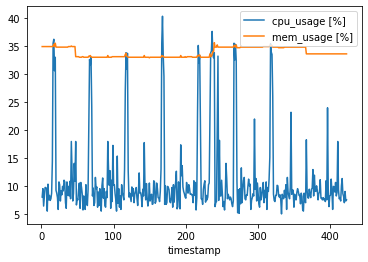

In [84]:
import matplotlib.pyplot as plt
x.plot(x = "timestamp").legend(loc='upper right')
plt.savefig("test.png")

In [ ]:
testcases_indexes = [1, 2, 3, 4, 9, 10, 11, 12, 15, 16, 17, 18, 23, 24, 25, 26, 32, 34, 13, 27, 29, 35, 37]
for index in testcases_indexes:
    efficiency_data = pd.read_csv(f"results/tc_{index}.csv").drop(columns="Unnamed: 0")
    efficiency_data.plot(x = "timestamp", title=f"testcase_{index}").legend(loc='upper right')
    plt.savefig(f"results/charts/tc_{index}.png")

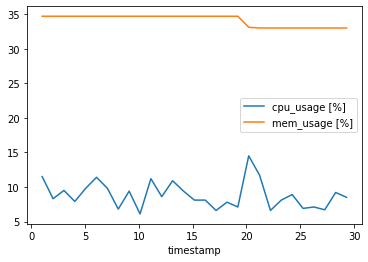

In [91]:
# teraz jeszcze manualnie reszte csv
name = "cpu_only_user_activity"
x = pd.read_csv(f"results/{name}.csv").drop(columns="Unnamed: 0")
x.plot(x = "timestamp").legend(loc='best')
plt.savefig(f"results/charts/{name}.png")

In [95]:
efficiency_data.head()

,timestamp,cpu_usage [%],mem_usage [%]
0,1.005714,35.0,33.4
1,2.017930,32.4,33.4
2,3.027942,30.9,33.2
3,4.038270,19.2,33.1
4,5.049380,3.8,33.1


In [7]:
# srednie wartosci
testcases_indexes = [1, 2, 3, 4, 9, 10, 11, 12, 15, 16, 17, 18, 23, 24, 25, 26, 32, 34, 13, 27, 29, 35, 37]
columns = ["tc", "cpu_avg_percent", "mem_avg_percent"]
data = pd.DataFrame(columns=columns)
for index in testcases_indexes:
    efficiency_data = pd.read_csv(f"results/tc_{index}.csv").drop(columns="Unnamed: 0")
    cpu_avg = efficiency_data["cpu_usage [%]"].mean()
    mem_avg = efficiency_data["mem_usage [%]"].mean()
    data = add_row(data, row_data=[index, cpu_avg, mem_avg], columns=columns)

In [10]:
data.to_csv("results/average_values.csv", index=False)